In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/PosTech/Fase4/Tech Cha/base_petroleo.xlsx')
df.head()


,data,preco_bruto_Brent_FOB
0,2024-12-31,74.58
1,2024-12-30,74.24
2,2024-12-27,73.77
3,2024-12-26,73.50
4,2024-12-24,73.50


In [6]:
df = pd.DataFrame({
    "data": df['data'],
    "valor": df['preco_bruto_Brent_FOB']
})

In [7]:
df_mensal = df.groupby(df["data"].dt.to_period("M")).agg({"valor": "mean"}).reset_index()
df_mensal.rename(columns={"data": "mes", "valor": "mean_mensal"}, inplace=True)

In [8]:
df_mensal.head()

,mes,mean_mensal
0,2004-01,31.266000
1,2004-02,30.648621
2,2004-03,33.663226
3,2004-04,33.346667
4,2004-05,37.294839


In [9]:
df_anual = df.groupby(df["data"].dt.to_period("Y")).agg({"valor": "mean"}).reset_index()
df_anual.rename(columns={"data": "ano", "valor": "media_anual"}, inplace=True)

In [10]:
df_anual.head()

,ano,media_anual
0,2004,38.162000
1,2005,54.325879
2,2006,65.116951
3,2007,72.030279
4,2008,97.531791


In [11]:
df['data'] = pd.to_datetime(df["data"])
df.dtypes

,0
data,datetime64[ns]
valor,float64


In [12]:
import matplotlib.pyplot as plt

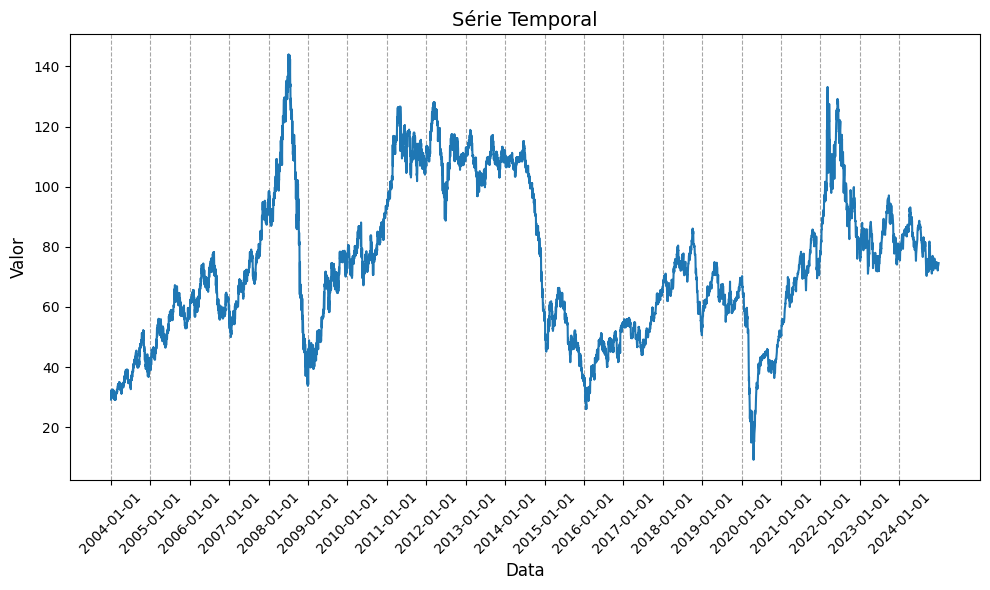

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['valor'], linestyle='-')
plt.title('Série Temporal', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.grid(True, which='major', axis='x', linestyle='--', color='gray', alpha=0.7)
plt.xticks(pd.date_range(start='2004-01-01', end='2024-12-31', freq='YS'), rotation=45)
plt.tight_layout()
plt.show()